In [1]:
import pandas as pd
import selenium
import time
from bs4 import BeautifulSoup as bs

from  selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as ec
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import NoSuchElementException


import requests

import warnings
warnings.filterwarnings('ignore')

# 1. Write a python program which searches all the product under a particular product from www.amazon.in. The 
product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for 
guitars. 

In [2]:
#Getting driver
driver=webdriver.Chrome()

In [3]:
#fetching url
driver.get('http://www.amazon.in/')

In [4]:
#searching for desired product
user_ip=input('Enter the product to be serached')+'s'
product=driver.find_element(By.XPATH,'/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input')
product.send_keys(user_ip)

Enter the product to be serachedguitar


In [5]:
#clicking on serach
search=driver.find_element(By.XPATH,'/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input')
search.click()

In [6]:
driver.maximize_window()

# 2. In the above question, now scrape the following details of each product listed in first 3 pages of your search 
results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then 
scrape all the products available under that product name. Details to be scraped are: "Brand 
Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and 
“Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“. 

In [7]:
#getting the required data in the lists
brand_name=[]
name_of_the_product=[]
price=[]
return_exchange=[]
expected_delivery=[]
availability=[]
url=[]

In [8]:
#fetching url from pages
for pages in range(3):
   
    urltag=driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
    for i in urltag:
            url.append(i.get_attribute('href'))
            
    ##finding nextpage
    try:
        np=driver.find_element(By.XPATH,'//a[@class="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"]')
        np.click()
        time.sleep(2)
    except StaleElementReferenceException:
        break
   

In [9]:
print(len(url),url)

181 ['https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo0MDg3ODk2NTE4ODIxNjgxOjE2OTk4NDk1NTU6c3BfYXRmOjMwMDA3MzAzMTY2NTUzMjo6MDo6&url=%2FMedellin-Acoustic-Guitar-learning-course%2Fdp%2FB0CGRX6ZMF%2Fref%3Dsr_1_1_sspa%3Fcrid%3D3FTRNF1QYTPLN%26keywords%3Dguitars%26qid%3D1699849555%26sprefix%3Dguitars%252Caps%252C376%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1', 'https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo0MDg3ODk2NTE4ODIxNjgxOjE2OTk4NDk1NTU6c3BfYXRmOjMwMDAyMjkzODAyNjEzMjo6MDo6&url=%2FKadence-Professional-Acoustic-Rosewood-Natural%2Fdp%2FB0CC927DLN%2Fref%3Dsr_1_2_sspa%3Fcrid%3D3FTRNF1QYTPLN%26keywords%3Dguitars%26qid%3D1699849555%26sprefix%3Dguitars%252Caps%252C376%26sr%3D8-2-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1', 'https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo0MDg3ODk2NTE4ODIxNjgxOjE2OTk4NDk1NTU6c3BfYXRmOjMwMDAzMTMyOTU5MDczMjo6MDo6&url=%2FKadence-A281BK-Professional-Acoustic-Rosewood%2Fdp%2FB0CD7D6C6R%2Fref%3Dsr_1_3_sspa%3Fcrid%3D3FTRNF1QYTPLN%26keywor

In [10]:
for u in url:
    driver.get(u)                                                        # Loading the webpage by url
   
    time.sleep(2)
    
    try:
        brand = driver.find_element(By.XPATH,'//a[@id="bylineInfo"]')      # Extracting Brand from xpath
        brand_name.append(brand.text)
    except NoSuchElementException:
        brand_name.append('-')
    
    try:
        name = driver.find_element(By.XPATH,'//h1[@id="title"]/span')      # Extracting Name from xpath
        name_of_the_product.append(name.text)
    except NoSuchElementException:
        name_of_the_product.append('-')
    

    
    try:
        price1 = driver.find_element(By.XPATH,'/html/body/div[2]/div/div[5]/div[3]/div[4]/div[13]/div/div/div[4]/div[1]/span[2]/span[2]/span[2]')            # Extracting Price from xpath
        price.append(price1.text)
    except NoSuchElementException:
        price.append('-')
    try:                                                                                     # Extracting Return/Exchange policy from xpath
        ret = driver.find_element(By.XPATH,'/html/body/div[2]/div/div[5]/div[3]/div[4]/div[24]/div[2]/div/div/div/div[2]/div/ol/li[3]/div/span/div[2]/span')
        return_exchange.append(ret.text)
    except NoSuchElementException:
        return_exchange.append('-')
    try:
        delivry = driver.find_element(By.XPATH,'/html/body/div[2]/div/div[5]/div[3]/div[1]/div[3]/div/div[1]/div/div/div/form/div/div/div/div/div[4]/div/div[3]/div[9]/div[1]/div/div/div/span/span[1]')         # Extracting Expected Delivery from xpath
        expected_delivery.append(delivry.text)
    except NoSuchElementException:
        expected_delivery.append('-')
    
    try:
        avl = driver.find_element(By.XPATH,'//div[@id="availability"]/span')                # Extracting Availability from xpath
        availability.append(avl.text)
    except NoSuchElementException:
        availability.append('-')
    
   
                                                                  # Saving url
    time.sleep(2)

In [11]:
print(len(brand_name),
len(name_of_the_product),
len(price),
len(return_exchange),
len(expected_delivery),
len(availability),
len(url))

181 181 181 181 181 181 181


In [14]:
##Making dataframe

In [12]:
amazondf=pd.DataFrame({'BrandName':brand_name,'NameOfProduct':name_of_the_product,'Price':price,'ReturnExchange':return_exchange,
                       'expectedDelivery':expected_delivery,'Availability':availability,'Url':url})

In [13]:
amazondf

,BrandName,NameOfProduct,Price,ReturnExchange,expectedDelivery,Availability,Url
0,Brand: Medellin,Medellin 38” Acoustic Guitar with (free learni...,"1,899",7 days Replacement,"Saturday, 18 November",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,Visit the Kadence Store,Kadence A281 Professional Acoustic Rosewood gu...,"6,499",7 days Replacement,"Saturday, 18 November",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,Visit the Kadence Store,Kadence A281BK Professional Acoustic Rosewood ...,"6,499",7 days Replacement,"Thursday, 16 November",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3,Visit the Kadence Store,"Kadence rosewood Guitar Frontier Series, Elect...","5,499",7 days Replacement,"Friday, 17 November",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
4,Visit the JUAREZ Store,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...","1,999",7 days Replacement,"Thursday, 16 November",In stock,https://www.amazon.in/Juarez-Acoustic-Cutaway-...
...,...,...,...,...,...,...,...
176,Brand: Epiphone,Epiphone Dove Pro Acoustic Electric Guitar,-,-,-,Only 1 left in stock.,https://www.amazon.in/Epiphone-EEDVVBNH1-Acous...
177,Visit the SG Musical Store,SG Musical - Red - - Clutch Guitar Capo (Red) ...,-,-,-,In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
178,Brand: Minicreature,Minicreature- Miniature Electrical Guitar/Home...,-,-,"Friday, 24 November",Only 1 left in stock.,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
179,Visit the blueberry Store,"BLUEBERRY B40L, Acoustic Guitar Kit Inbuilt Tr...","4,279",7 days Replacement,"Friday, 17 November",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...


# 3. Write a python program to access the search bar and search button on images.google.com and scrape 10 
images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.

In [69]:
#getting url
url='https://www.google.com/search?q={s}&sca_esv=580462557&tbm=isch&source=hp&biw=1034&bih=570&ei=l5hLZdOCBpWG5OUPjNiTyAI&iflsig=AO6bgOgAAAAAZUumpyKCrDOXkVJ9SequxrVYFCTYyw98&ved=0ahUKEwiTqt6IzLSCAxUVA7kGHQzsBCkQ4dUDCAc&oq=fruits&gs_lp=EgNpbWciBmZydWl0czIIEAAYgAQYsQMyCBAAGIAEGLEDMggQABiABBixAzIIEAAYgAQYsQMyCBAAGIAEGLEDMggQABiABBixAzIIEAAYgAQYsQMyCBAAGIAEGLEDMggQABiABBixAzIIEAAYgAQYsQNI0XBQAFhAcAB4AJABAJgB9AGgAbYGqgEFMC4xLjO4AQzIAQD4AQGKAgtnd3Mtd2l6LWltZw&sclient=img'

In [52]:
#opening browser and getting url
driver=webdriver.Chrome()
driver.get(url.format(s='fruits'))

In [55]:
#finding and extracting images
fruit=[]
fruittag=driver.find_elements(By.XPATH,"//img[contains(@class,'rg_i Q4LuWd')]")
for i in fruittag:
    fruit.append(i.get_attribute('src'))

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTAV0j5ltLvuuCwuqhOW_G9Q9EOMv3V10sxyuj1dHrbIhvF50Kk_p_A5uNc78mkLCoErKg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSKEm2vnHN46Ggu7JXCXoSGTZGVorIQcdJDoORIJL2nQuYOb6Tket_1oZKpmJCn7P3uQ1g&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS92N5WDIp6WPV1CCe9QI_MCeUTEojLurFUg-y9Zf6sBRDGKSJBdNetpQBsHpNYV7QUUZA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSFs3g6NUgvn8eR3MGspklEireKK_gErWGinRFx6lfLijNR3xyuH9Vwklwiy3sJ3uFi-78&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSlTxho4ctAuGF119v5lR4Qe1Xfj7l13gg7Cw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTu1Kjms532dsp8GeiBde2rgUOvZjhO9uybYg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRIbUi2-WkWOL9WkY8p6f5Eut6KeLx5-WuUoA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT1QR
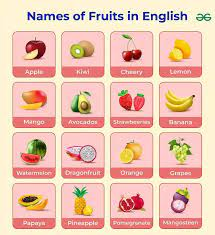
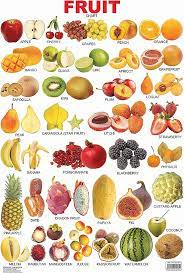
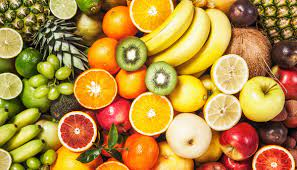
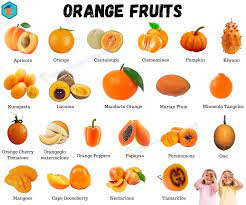
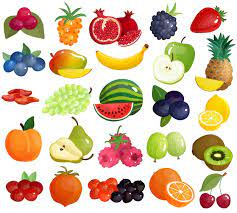
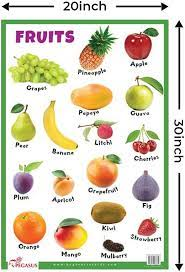
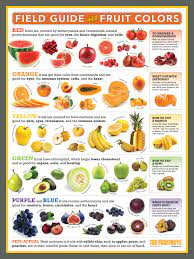
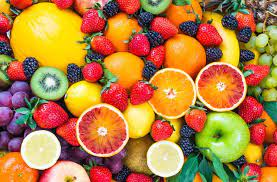
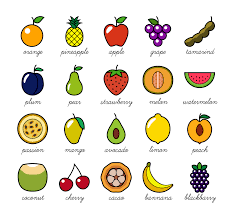
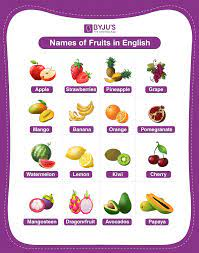
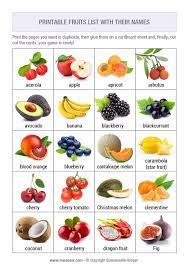
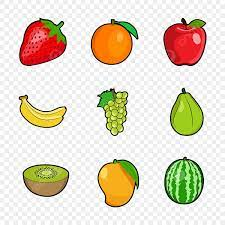
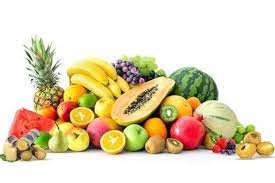
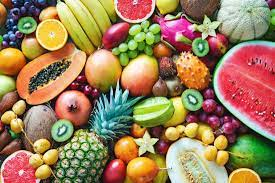
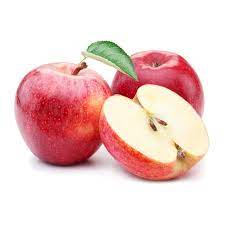
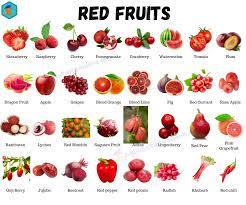

In [56]:
fruit

In [57]:
print(len(fruit))

100


In [65]:
#storing images in folder
import urllib
for i in range(10):    
    urllib.request.urlretrieve(str(fruit[i]),"imagesgoogle/fruits{}.jpg".format(i))

In [67]:
driver.close()

In [70]:
###fetching cars images
driver=webdriver.Chrome()
driver.get(url.format(s='cars'))   #searching for car images



In [71]:
#finding and extracting i=car images
carimg=[]
car=driver.find_elements(By.XPATH,'//img[contains(@class,"rg_i Q4LuWd")]')
for i in car:
    carimg.append(i.get_attribute('src'))

In [72]:
print(len(carimg))

48


In [75]:
#downloading images in folder
import urllib
for j in range(10):
    urllib.request.urlretrieve(str(carimg[j]),"imagesgoogle/cars{}.jpg".format(j))
    

In [76]:
##getting machinelearning images
driver.get(url.format(s='Machine Learning'))

In [77]:
#finding and extracting machine learning images
MLimg=[]
ML=driver.find_elements(By.XPATH,'//img[contains(@class,"rg_i Q4LuWd")]')
for i in ML:
    MLimg.append(i.get_attribute('src'))

In [78]:
print(len(ML))

48


In [79]:
#downloading images in folder

for m in range(10):
    urllib.request.urlretrieve(str(MLimg[m]),"imagesgoogle/ML{}.jpg".format(m))
    

In [80]:
##geting driver and vrowesr ready to exctract cakes images
driver.get(url.format(s='cakes'))

In [81]:
#finding and extracting cake images
cakeimg=[]
c=driver.find_elements(By.XPATH,'//img[contains(@class,"rg_i Q4LuWd")]')
for i in c:
    cakeimg.append(i.get_attribute('src'))

In [82]:
print(len(cakeimg))

48


In [83]:
#downloading images in folder

for c in range(10):
    urllib.request.urlretrieve(str(cakeimg[c]),"imagesgoogle/cakes{}.jpg".format(c))
    

In [84]:
#getting driver to extract guitar images
driver.get(url.format(s='guitar'))

In [85]:
#finding and extracting cake images
gimg=[]
g=driver.find_elements(By.XPATH,'//img[contains(@class,"rg_i Q4LuWd")]')
for i in g:
    gimg.append(i.get_attribute('src'))

In [86]:
print(len(gimg))

48


In [87]:
#downloading images in folder

for g in range(10):
    urllib.request.urlretrieve(str(gimg[g]),"imagesgoogle/guitar{}.jpg".format(g))
    

In [88]:
driver.close()

# 4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com
and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand 
Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, 
“Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the 
details is missing then replace it by “- “. Save your results in a dataframe and CSV. 

In [18]:
#opening chrome browser
driver=webdriver.Chrome()

In [19]:
#getting url on browser
driver.get('http://www.flipkart.com/')

In [20]:
driver.maximize_window()    ##maximizing chrome window

In [21]:
#input smartphones
input1=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[1]/div/div/div/div/div[1]/div/div[1]/div/div[1]/header/div[1]/div[2]/form/div/div/input')
input1.send_keys('smartphone')

In [23]:
#clicking on search
search=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[1]/div/div/div/div/div[1]/div/div[1]/div/div[1]/header/div[1]/div[2]/form/div/button')
search.click()

In [24]:
#getting url of each phone
url=[]
urltag=driver.find_elements(By.CLASS_NAME,"_1fQZEK")
for i in urltag:
    url.append(i.get_attribute('href'))

In [25]:
print(len(url))

24


In [26]:
Brand_Name=[]
Colour=[]
Storage_RAM_ROM=[]
P_F_Camera=[]
Display_size_Resolution=[]
ProcessorAndCores=[]
Battery=[]
Price=[]


In [28]:
#scraping the Brand_Name 
BName=driver.find_elements(By.XPATH,"//div[@class='_4rR01T']")
for i in BName:
    if i.text is None :
        Brand_Name.append("--") 
    else:
        Brand_Name.append(i.text)
print(len(Brand_Name),Brand_Name)

24 ['POCO X5 5G (Supernova Green, 256 GB)', 'SAMSUNG Galaxy F14 5G (OMG Black, 128 GB)', 'APPLE iPhone 14 (Blue, 128 GB)', 'APPLE iPhone 14 (Starlight, 128 GB)', 'APPLE iPhone 14 (Midnight, 128 GB)', 'APPLE iPhone 14 Plus (Blue, 128 GB)', 'MOTOROLA g54 5G (Mint Green, 256 GB)', 'SAMSUNG Galaxy F14 5G (GOAT Green, 128 GB)', 'POCO C51 (Royal Blue, 64 GB)', 'MOTOROLA g84 5G (Marshmallow Blue, 256 GB)', 'SAMSUNG Galaxy F14 5G (GOAT Green, 128 GB)', 'POCO X5 5G (Wildcat Blue, 256 GB)', 'realme C51 (Carbon Black, 64 GB)', 'realme C51 (Mint Green, 64 GB)', 'vivo T2x 5G (Marine Blue, 128 GB)', 'vivo T2x 5G (Aurora Gold, 128 GB)', 'POCO X5 5G (Jaguar Black, 256 GB)', 'POCO X5 5G (Jaguar Black, 128 GB)', 'vivo T2x 5G (Glimmer Black, 128 GB)', 'POCO M6 Pro 5G (Power Black, 128 GB)', 'SAMSUNG Galaxy F14 5G (B.A.E. Purple, 128 GB)', 'SAMSUNG Galaxy F14 5G (B.A.E. Purple, 128 GB)', 'vivo T2x 5G (Aurora Gold, 128 GB)', 'vivo T2x 5G (Glimmer Black, 128 GB)']


In [29]:
#scraping the Storage_RAM_ROM 
ram=driver.find_elements(By.XPATH,"//ul[@class='_1xgFaf']//li[1]")
for i in ram:
    if i.text is None :
        Storage_RAM_ROM.append("--") 
    else:
        Storage_RAM_ROM.append(i.text)
print(len(Storage_RAM_ROM),Storage_RAM_ROM)

24 ['8 GB RAM | 256 GB ROM | Expandable Upto 1 TB', '6 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '128 GB ROM', '128 GB ROM', '128 GB ROM', '128 GB ROM', '12 GB RAM | 256 GB ROM | Expandable Upto 1 TB', '4 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB', '12 GB RAM | 256 GB ROM', '6 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '8 GB RAM | 256 GB ROM | Expandable Upto 1 TB', '4 GB RAM | 64 GB ROM | Expandable Upto 2 TB', '4 GB RAM | 64 GB ROM | Expandable Upto 2 TB', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 256 GB ROM | Expandable Upto 1 TB', '6 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '8 GB RAM | 128 GB ROM', '6 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '6 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '4 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '6 GB RAM | 128 GB ROM', '6 GB RAM | 128 GB ROM']


In [31]:
#scraping the P_F_Camera 
PC=driver.find_elements(By.XPATH,"//ul[@class='_1xgFaf']//li[3]")
for i in PC:
    if i.text is None :
        P_F_Camera.append("--") 
    else:
        P_F_Camera.append(i.text)
print(len(P_F_Camera),P_F_Camera)

24 ['48MP + 8MP + 2MP | 13MP Front Camera', '50MP + 2MP | 13MP Front Camera', '12MP + 12MP | 12MP Front Camera', '12MP + 12MP | 12MP Front Camera', '12MP + 12MP | 12MP Front Camera', '12MP + 12MP | 12MP Front Camera', '50MP (OIS) + 8MP | 16MP Front Camera', '50MP + 2MP | 13MP Front Camera', '8MP Dual Rear Camera | 5MP Front Camera', '50MP (OIS) + 8MP | 16MP Front Camera', '50MP + 2MP | 13MP Front Camera', '48MP + 8MP + 2MP | 13MP Front Camera', '50MP + 0.08MP | 5MP Front Camera', '50MP + 0.08MP | 5MP Front Camera', '50MP + 2MP | 8MP Front Camera', '50MP + 2MP | 8MP Front Camera', '48MP + 8MP + 2MP | 13MP Front Camera', '48MP + 8MP + 2MP | 13MP Front Camera', '50MP + 2MP | 8MP Front Camera', '50MP + 2MP | 8MP Front Camera', '50MP + 2MP | 13MP Front Camera', '50MP + 2MP | 13MP Front Camera', '50MP + 2MP | 8MP Front Camera', '50MP + 2MP | 8MP Front Camera']


In [33]:
#scraping the Display_size_Resolution 
DS=driver.find_elements(By.XPATH,"//ul[@class='_1xgFaf']//li[2]")
for i in DS:
    if i.text is None :
        Display_size_Resolution.append("--") 
    else:
        Display_size_Resolution.append(i.text)
print(len(Display_size_Resolution),Display_size_Resolution)

24 ['16.94 cm (6.67 inch) Full HD+ Display', '16.76 cm (6.6 inch) Full HD+ Display', '15.49 cm (6.1 inch) Super Retina XDR Display', '15.49 cm (6.1 inch) Super Retina XDR Display', '15.49 cm (6.1 inch) Super Retina XDR Display', '17.02 cm (6.7 inch) Super Retina XDR Display', '16.51 cm (6.5 inch) Full HD+ Display', '16.76 cm (6.6 inch) Full HD+ Display', '16.56 cm (6.52 inch) HD+ Display', '16.64 cm (6.55 inch) Full HD+ Display', '16.76 cm (6.6 inch) Full HD+ Display', '16.94 cm (6.67 inch) Full HD+ Display', '17.12 cm (6.74 inch) HD Display', '17.12 cm (6.74 inch) HD Display', '16.71 cm (6.58 inch) Full HD+ Display', '16.71 cm (6.58 inch) Full HD+ Display', '16.94 cm (6.67 inch) Full HD+ Display', '16.94 cm (6.67 inch) Full HD+ Display', '16.71 cm (6.58 inch) Full HD+ Display', '17.25 cm (6.79 inch) Full HD+ Display', '16.76 cm (6.6 inch) Full HD+ Display', '16.76 cm (6.6 inch) Full HD+ Display', '16.71 cm (6.58 inch) Full HD+ Display', '16.71 cm (6.58 inch) Full HD+ Display']


In [34]:
#scraping the Battery 
B=driver.find_elements(By.XPATH,"//ul[@class='_1xgFaf']//li[4]")
for i in B:
    if i.text is None :
        Battery.append("--") 
    else:
        Battery.append(i.text)
print(len(Battery),Battery)

24 ['5000 mAh Battery', '6000 mAh Battery', 'A15 Bionic Chip, 6 Core Processor Processor', 'A15 Bionic Chip, 6 Core Processor Processor', 'A15 Bionic Chip, 6 Core Processor Processor', 'A15 Bionic Chip, 6 Core Processor Processor', '6000 mAh Battery', '6000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '6000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '6000 mAh Battery', '6000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery']


In [35]:
#scraping the Price 
price=driver.find_elements(By.XPATH,"//div[@class='_30jeq3 _1_WHN1']")
for i in price:
    if i.text is None :
        Price.append("--") 
    else:
        Price.append(i.text)
print(len(Price),Price)

24 ['₹14,999', '₹12,490', '₹57,499', '₹58,499', '₹58,499', '₹63,999', '₹15,999', '₹11,490', '₹5,999', '₹18,999', '₹12,490', '₹14,999', '₹7,999', '₹7,999', '₹14,999', '₹14,999', '₹14,999', '₹13,999', '₹14,999', '₹11,999', '₹12,490', '₹11,490', '₹12,999', '₹12,999']


In [36]:
FlipKart=pd.DataFrame([])
FlipKart['Brand_Name']=Brand_Name
FlipKart['Storage_RAM_ROM']=Storage_RAM_ROM
FlipKart['Amount P_F_Camera']=P_F_Camera
FlipKart['Display_size_Resolution']=Display_size_Resolution
FlipKart['Battery']=Battery
FlipKart['Price']=Price

In [37]:
FlipKart

,Brand_Name,Storage_RAM_ROM,Amount P_F_Camera,Display_size_Resolution,Battery,Price
0,"POCO X5 5G (Supernova Green, 256 GB)",8 GB RAM | 256 GB ROM | Expandable Upto 1 TB,48MP + 8MP + 2MP | 13MP Front Camera,16.94 cm (6.67 inch) Full HD+ Display,5000 mAh Battery,"₹14,999"
1,"SAMSUNG Galaxy F14 5G (OMG Black, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,50MP + 2MP | 13MP Front Camera,16.76 cm (6.6 inch) Full HD+ Display,6000 mAh Battery,"₹12,490"
2,"APPLE iPhone 14 (Blue, 128 GB)",128 GB ROM,12MP + 12MP | 12MP Front Camera,15.49 cm (6.1 inch) Super Retina XDR Display,"A15 Bionic Chip, 6 Core Processor Processor","₹57,499"
3,"APPLE iPhone 14 (Starlight, 128 GB)",128 GB ROM,12MP + 12MP | 12MP Front Camera,15.49 cm (6.1 inch) Super Retina XDR Display,"A15 Bionic Chip, 6 Core Processor Processor","₹58,499"
4,"APPLE iPhone 14 (Midnight, 128 GB)",128 GB ROM,12MP + 12MP | 12MP Front Camera,15.49 cm (6.1 inch) Super Retina XDR Display,"A15 Bionic Chip, 6 Core Processor Processor","₹58,499"
5,"APPLE iPhone 14 Plus (Blue, 128 GB)",128 GB ROM,12MP + 12MP | 12MP Front Camera,17.02 cm (6.7 inch) Super Retina XDR Display,"A15 Bionic Chip, 6 Core Processor Processor","₹63,999"
6,"MOTOROLA g54 5G (Mint Green, 256 GB)",12 GB RAM | 256 GB ROM | Expandable Upto 1 TB,50MP (OIS) + 8MP | 16MP Front Camera,16.51 cm (6.5 inch) Full HD+ Display,6000 mAh Battery,"₹15,999"
7,"SAMSUNG Galaxy F14 5G (GOAT Green, 128 GB)",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,50MP + 2MP | 13MP Front Camera,16.76 cm (6.6 inch) Full HD+ Display,6000 mAh Battery,"₹11,490"
8,"POCO C51 (Royal Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,8MP Dual Rear Camera | 5MP Front Camera,16.56 cm (6.52 inch) HD+ Display,5000 mAh Battery,"₹5,999"
9,"MOTOROLA g84 5G (Marshmallow Blue, 256 GB)",12 GB RAM | 256 GB ROM,50MP (OIS) + 8MP | 16MP Front Camera,16.64 cm (6.55 inch) Full HD+ Display,5000 mAh Battery,"₹18,999"


# 5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps. 

In [44]:
#getting driver
driver=webdriver.Chrome()

In [45]:
#getting url
driver.get('https://www.google.com/maps')
time.sleep(2)

In [46]:
#searching city
input1=input('Enter city name')
city=driver.find_element(By.XPATH,'/html/body/div[3]/div[8]/div[3]/div[1]/div[1]/div/div[2]/form/input')
city.send_keys(input1)

Enter city nameMumbai


In [47]:
#clicking on search button
search=driver.find_element(By.XPATH,'/html/body/div[3]/div[8]/div[3]/div[1]/div[1]/div/div[2]/div[1]/button')
search.click()

In [48]:
driver.maximize_window()

In [59]:
string=driver.current_url
print('url:',string)

import re
lat_long=re.findall(r'@(.*)data',string)
lat_long


url: https://www.google.com/maps/place/Mumbai,+Maharashtra/@19.082608,72.5521938,10z/data=!3m1!4b1!4m6!3m5!1s0x3be7c6306644edc1:0x5da4ed8f8d648c69!8m2!3d19.0759837!4d72.8776559!16zL20vMDR2bXA?entry=ttu


['19.082608,72.5521938,10z/']

In [75]:
list=lat_long[0].split(',')
list

['19.082608', '72.5521938', '10z/']

In [77]:
if len(list)>=2:
    latitude=list[0]
    longitude=list[1]
    print('Latitude=',latitude)
    print('Longitude=',longitude)
else :
    print('Exception raised')

Latitude= 19.082608
Longitude= 72.5521938


In [79]:
driver.close()

# 6. Write a program to scrap all the available details of best gaming laptops from digit.in. 

In [96]:
#getting driver
driver=webdriver.Chrome()

In [97]:
#getting url
driver.get('https://www.digit.in/')

In [98]:
driver.maximize_window()

In [99]:
#extrcting top 10s and clicking 
top10=driver.find_element(By.XPATH,'/html/body/div[4]/div/ul/li[4]/a')
top10.click()

In [100]:
#extracting top10 best laptops
laptop=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/div/div[2]/div[1]/div[3]/div[6]/p/a')
laptop.click()

In [102]:
brand_name=[]
Operating_System=[]
Display_Size =[]

Resolution=[]

Processor=[]

In [131]:
#extracting Brand name
bdt=driver.find_elements(By.XPATH,'//h3[@class="font130 mt0 mb10 mobilesblockdisplay "]/a')

for i in bdt:
    if i.text is None:
        brand_name.append('--')
    else:
        brand_name.append(i.text)
        
print(len(brand_name),brand_name)

6 ['Apple MacBook Air 2022 M2 MLY03HN/A', 'Samsung Galaxy Book3 Pro 360', 'Lenovo Yoga 9i13th Gen Core i7-1360P', 'Apple MacBook Pro M2 (2023-MPHK3HN/A)', 'Dell XPS 13 Plus D560075WIN9S 12th Gen Core i7-1260P', 'Acer Swift X SFX16-51G 11th Gen Core i7-11390H']


In [114]:
#extracting OS:
ost=driver.find_elements(By.XPATH,'//div[@class="woo_code_zone_loop clearbox"]/div[1]')

for i in ost:
    if i.text is None:
        Operating_System.append('--')
    else:
        Operating_System.append(i.text)
        
print(len(Operating_System),Operating_System)

6 ['Operating System:\niOS', '', 'Operating System:\nWindows 11 Home', 'Operating System:\nMac', 'Operating System:\nWindows 11', 'Operating System:\nWindows 11 Home']


In [121]:
#extracting Display size
ds=driver.find_elements(By.XPATH,'//div[@class="woo_code_zone_loop clearbox"]/div[2]')

for i in ds:
    if i.text is None:
        Display_Size.append('-')
    else:
        Display_Size.append(i.text)
        
print(len(Display_Size),Display_Size)

6 ['Display Size :\n13.6', '', 'Display Size :\n14', 'Display Size :\n14.2', 'Display Size :\n13.4', 'Display Size :\n16']


In [122]:
#extracting Resolution
re=driver.find_elements(By.XPATH,'//div[@class="woo_code_zone_loop clearbox"]/div[3]')

for i in re:
    if i.text is None:
        Resolution.append('--')
    else:
        Resolution.append(i.text)
        
print(len(Resolution),Resolution)

6 ['Resolution :\n2560 x 1600', '', 'Resolution :\n2880 x 1800', '', 'Resolution :\n3840 x 2400', 'Resolution :\n1920 x 1080']


In [123]:
#extracting processor
alltag=driver.find_elements(By.XPATH,'//div[@class="woo_code_zone_loop clearbox"]/div[4]')
for i in alltag:
    if i.text is None:
        Processor.append("-")
    else:
        Processor.append(i.text)
    
print(len(Processor),Processor)

6 ['Processor :\nApple M2', '', 'Processor :\n13th Gen Intel Core i7-1360P', '', 'Processor :\n12th Gen Intel EVO Core i7-1260P', 'Processor :\n11th Gen Intel Core i7-11390H']


In [132]:
#making dataframe
laptops=pd.DataFrame([])
laptops['Name']=brand_name
laptops['Display_Size']=Display_Size
laptops['Operation_System']=Operating_System
laptops['Resolution']=Resolution
laptops['Processor']=Processor

In [133]:
laptops

,Name,Display_Size,Operation_System,Resolution,Processor
0,Apple MacBook Air 2022 M2 MLY03HN/A,Display Size :\n13.6,Operating System:\niOS,Resolution :\n2560 x 1600,Processor :\nApple M2
1,Samsung Galaxy Book3 Pro 360,,,,
2,Lenovo Yoga 9i13th Gen Core i7-1360P,Display Size :\n14,Operating System:\nWindows 11 Home,Resolution :\n2880 x 1800,Processor :\n13th Gen Intel Core i7-1360P
3,Apple MacBook Pro M2 (2023-MPHK3HN/A),Display Size :\n14.2,Operating System:\nMac,,
4,Dell XPS 13 Plus D560075WIN9S 12th Gen Core i7...,Display Size :\n13.4,Operating System:\nWindows 11,Resolution :\n3840 x 2400,Processor :\n12th Gen Intel EVO Core i7-1260P
5,Acer Swift X SFX16-51G 11th Gen Core i7-11390H,Display Size :\n16,Operating System:\nWindows 11 Home,Resolution :\n1920 x 1080,Processor :\n11th Gen Intel Core i7-11390H


# 7. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: 
“Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”. 

In [18]:
#getting driver
driver=webdriver.Chrome()

In [19]:
#getting url
driver.get('http://www.forbes.com/')

In [20]:
#finding all billionaries
billionaries=driver.find_element(By.XPATH,'/html/body/div[1]/header/nav/div[1]/div[1]/div/div[2]/ul/li[2]/div[1]')
billionaries.click()

In [21]:
#world billionaries scrapping 
worldb=driver.find_element(By.XPATH,'/html/body/div[1]/div/main/div/section/div[2]/div/div/div[1]/div/div[2]/div/div/a')
worldb.click()

In [22]:
#extracting rank
rank=[]
ranktag=driver.find_elements(By.XPATH,'//div[@class="Table_rank___YBhk Table_dataCell__2QCve"]')
for i in ranktag:
    rank.append(i.text)

In [23]:
print(len(rank))

200


In [24]:
rank

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '17',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '31',
 '33',
 '34',
 '35',
 '35',
 '37',
 '38',
 '39',
 '40',
 '41',
 '41',
 '43',
 '43',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '65',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '72',
 '74',
 '74',
 '76',
 '77',
 '77',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '84',
 '86',
 '86',
 '88',
 '89',
 '89',
 '89',
 '92',
 '93',
 '94',
 '94',
 '94',
 '97',
 '97',
 '99',
 '100',
 '101',
 '101',
 '103',
 '104',
 '104',
 '106',
 '107',
 '108',
 '108',
 '108',
 '108',
 '112',
 '113',
 '114',
 '115',
 '116',
 '116',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '124',
 '126',
 '127',
 '128',
 '128',
 '130',
 '130',
 '130',
 '133',
 '133',
 '133',
 '136',
 '137',
 '138',
 '13

In [56]:
#extracting names
name=[]
nametag=driver.find_elements(By.XPATH,'//div[@class="TableRow_row__L-0Km"]/div[2]/div')
for j in nametag:
    name.append(j.text)

In [57]:
print(len(name))

199


In [58]:
nt=driver.find_element(By.XPATH,'/html/body/div[1]/div[2]/div[3]/div[2]/div[2]/div[2]/div[1]/div[1]/div[1]/div[2]/div[1]/div[1]/div[2]/div')
name.insert(0,nt.text)

In [34]:
#extracting networth
nw=[]
nwtag=driver.find_elements(By.XPATH,'//div[@class="TableRow_row__L-0Km"]/div[3]/div')
for k in nwtag:
    nw.append(k.text)

In [35]:
print(len(nw))

199


In [36]:
#exyracing 1st row data
nwt=driver.find_element(By.XPATH,'/html/body/div[1]/div[2]/div[3]/div[2]/div[2]/div[2]/div[1]/div[1]/div[1]/div[2]/div[1]/div[1]/div[3]/div')
nw.insert(0,nwt.text)

In [37]:
nw

['$211 B',
 '$180 B',
 '$114 B',
 '$107 B',
 '$106 B',
 '$104 B',
 '$94.5 B',
 '$93 B',
 '$83.4 B',
 '$80.7 B',
 '$80.5 B',
 '$79.2 B',
 '$77.3 B',
 '$76 B',
 '$68 B',
 '$64.4 B',
 '$59 B',
 '$59 B',
 '$58.8 B',
 '$57.6 B',
 '$56.7 B',
 '$54.4 B',
 '$50.1 B',
 '$47.2 B',
 '$45.1 B',
 '$45 B',
 '$42.9 B',
 '$40.1 B',
 '$39.1 B',
 '$38.9 B',
 '$38.3 B',
 '$38.3 B',
 '$38 B',
 '$35.3 B',
 '$35 B',
 '$35 B',
 '$34.7 B',
 '$33.4 B',
 '$32.6 B',
 '$32.1 B',
 '$31.6 B',
 '$31.6 B',
 '$31.2 B',
 '$31.2 B',
 '$30.2 B',
 '$29.7 B',
 '$29.5 B',
 '$28.5 B',
 '$28.1 B',
 '$27.8 B',
 '$27.4 B',
 '$27 B',
 '$26.7 B',
 '$26.6 B',
 '$25.6 B',
 '$25.5 B',
 '$25.3 B',
 '$25.2 B',
 '$24.6 B',
 '$24.4 B',
 '$24.2 B',
 '$23.7 B',
 '$23.5 B',
 '$23.4 B',
 '$23.1 B',
 '$23.1 B',
 '$22.9 B',
 '$22.6 B',
 '$22.4 B',
 '$22.1 B',
 '$22 B',
 '$21.6 B',
 '$21.6 B',
 '$21.2 B',
 '$21.2 B',
 '$21.1 B',
 '$21 B',
 '$21 B',
 '$20.9 B',
 '$20.5 B',
 '$20.2 B',
 '$19.6 B',
 '$19.1 B',
 '$19 B',
 '$19 B',
 '$18.9 B',
 '$1

In [38]:
#extracting AGE
age=[]
agetag=driver.find_elements(By.XPATH,'//div[@class="TableRow_row__L-0Km"]/div[4]/div')
for i in agetag:
    age.append(i.text)

In [39]:
print(len(age),age)

199 ['51', '59', '78', '92', '67', '81', '83', '65', '67', '69', '50', '87', '49', '68', '38', '87', '60', '74', '78', '73', '65', '58', '60', '85', '39', '83', '86', '85', '58', '83', '87', '94', '51', '77', '54', '30', '54', '74', '65', '74', '72', '82', '78', '43', '87', '95', '64', '84', '76', '60', '69', '51', '69', '77', '74', '78', '51', '56', '52', '82', '62', '58', '80', '80', '83', '70', '81', '65', '66', '52', '61', '67', '36', '52', '60', '90', '77', '57', '72', '84', '61', '73', '59', '55', '72', '57', '57', '77', '65', '70', '61', '72', '66', '87', '73', '90', '83', '92', '70', '72', '55', '72', '75', '67', '55', '67', 'N/A', 'N/A', '83', '76', '67', '45', '68', '56', '83', '81', '78', '68', '60', '59', '69', '95', '55', '65', '93', '67', '57', '94', '78', '76', '47', '80', '80', '71', '60', '90', '64', '75', '58', '57', '50', '69', '72', '59', '99', '82', '38', '73', '73', '59', '50', '74', '69', '62', '57', '88', '72', '58', '51', '83', '85', '67', '93', '81', '73', '57

In [40]:
ag=driver.find_element(By.XPATH,'/html/body/div[1]/div[2]/div[3]/div[2]/div[2]/div[2]/div[1]/div[1]/div[1]/div[2]/div[1]/div[1]/div[4]/div')
age.insert(0,ag.text)

In [41]:
print(len(age),age)

200 ['74', '51', '59', '78', '92', '67', '81', '83', '65', '67', '69', '50', '87', '49', '68', '38', '87', '60', '74', '78', '73', '65', '58', '60', '85', '39', '83', '86', '85', '58', '83', '87', '94', '51', '77', '54', '30', '54', '74', '65', '74', '72', '82', '78', '43', '87', '95', '64', '84', '76', '60', '69', '51', '69', '77', '74', '78', '51', '56', '52', '82', '62', '58', '80', '80', '83', '70', '81', '65', '66', '52', '61', '67', '36', '52', '60', '90', '77', '57', '72', '84', '61', '73', '59', '55', '72', '57', '57', '77', '65', '70', '61', '72', '66', '87', '73', '90', '83', '92', '70', '72', '55', '72', '75', '67', '55', '67', 'N/A', 'N/A', '83', '76', '67', '45', '68', '56', '83', '81', '78', '68', '60', '59', '69', '95', '55', '65', '93', '67', '57', '94', '78', '76', '47', '80', '80', '71', '60', '90', '64', '75', '58', '57', '50', '69', '72', '59', '99', '82', '38', '73', '73', '59', '50', '74', '69', '62', '57', '88', '72', '58', '51', '83', '85', '67', '93', '81', '73

In [43]:
#extracting source
source=[]
st=driver.find_elements(By.XPATH,'//div[@class="TableRow_row__L-0Km"]/div[6]/div')
for c in st:
    source.append(c.text)

In [44]:
print(len(source),source)

199 ['Tesla, SpaceX', 'Amazon', 'Oracle', 'Berkshire Hathaway', 'Microsoft', 'Bloomberg LP', 'Telecom', 'Diversified', 'Microsoft', "L'Oréal", 'Google', 'Zara', 'Google', 'Beverages, pharmaceuticals', 'Facebook', 'Koch Industries', 'Koch Industries', 'Walmart', 'Walmart', 'Walmart', 'Media', 'Dell Technologies', 'Infrastructure, commodities', 'Nike', 'TikTok', 'Retail', 'Luxury goods', 'Shipping', 'Nutella, chocolates', 'Candy, pet food', 'Candy, pet food', 'Diversified', 'Internet media', 'Casinos', 'Hedge funds', 'Red Bull', 'Batteries', 'Fashion retail', 'Music, chemicals', 'Chanel', 'Chanel', 'Shipping', 'Shipping', 'E-commerce', 'Fasteners', 'Real estate', 'Trading, investments', 'Hedge funds', 'Investments', 'BMW, pharmaceuticals', 'Mining', 'Online games', 'Mining', 'software services', 'Coal', 'Discount brokerage', 'Fertilizers, coal', 'BMW', 'Amazon', 'Banking, tobacco', 'Metals', 'E-commerce', 'Home appliances', 'Mining', 'Banking, tobacco', 'Chemicals', 'Vaccines', 'Internet

In [45]:
s=driver.find_element(By.XPATH,'/html/body/div[1]/div[2]/div[3]/div[2]/div[2]/div[2]/div[1]/div[1]/div[1]/div[2]/div[1]/div[1]/div[6]/div/span')
source.insert(0,s.text)

In [46]:
print(len(source))

200


In [47]:
#extracting industry
industry=[]
intag=driver.find_elements(By.XPATH,'//div[@class="TableRow_row__L-0Km"]/div[7]/div')
for i in intag:
    industry.append(i.text)

In [48]:
i=driver.find_element(By.XPATH,'/html/body/div[1]/div[2]/div[3]/div[2]/div[2]/div[2]/div[1]/div[1]/div[1]/div[2]/div[1]/div[1]/div[7]/div')
industry.insert(0,i.text)

In [49]:
print(len(industry),industry)

200 ['Fashion & Retail', 'Automotive', 'Technology', 'Technology', 'Finance & Investments', 'Technology', 'Media & Entertainment', 'Telecom', 'Diversified', 'Technology', 'Fashion & Retail', 'Technology', 'Fashion & Retail', 'Technology', 'Food & Beverage', 'Technology', 'Diversified', 'Diversified', 'Fashion & Retail', 'Fashion & Retail', 'Fashion & Retail', 'Media & Entertainment', 'Technology', 'Diversified', 'Fashion & Retail', 'Technology', 'Fashion & Retail', 'Fashion & Retail', 'Logistics', 'Food & Beverage', 'Food & Beverage', 'Food & Beverage', 'Diversified', 'Technology', 'Gambling & Casinos', 'Finance & Investments', 'Food & Beverage', 'Automotive', 'Fashion & Retail', 'Diversified', 'Fashion & Retail', 'Fashion & Retail', 'Logistics', 'Logistics', 'Technology', 'Manufacturing', 'Real Estate', 'Finance & Investments', 'Finance & Investments', 'Finance & Investments', 'Automotive', 'Metals & Mining', 'Technology', 'Metals & Mining', 'Technology', 'Energy', 'Finance & Investme

In [50]:
#extracting country
country=[]
ctag=driver.find_elements(By.XPATH,'//div[@class="TableRow_row__L-0Km"]/div[5]')
for j in ctag:
    country.append(j.text)

In [51]:
ct=driver.find_element(By.XPATH,'/html/body/div[1]/div[2]/div[3]/div[2]/div[2]/div[2]/div[1]/div[1]/div[1]/div[2]/div[1]/div[1]/div[5]')
country.insert(0,ct.text)

In [52]:
print(len(country),country)

200 ['France', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'Mexico', 'India', 'United States', 'France', 'United States', 'Spain', 'United States', 'China', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'Canada', 'United States', 'India', 'United States', 'China', 'Germany', 'France', 'Germany', 'Italy', 'United States', 'United States', 'Hong Kong', 'China', 'United States', 'United States', 'Austria', 'Hong Kong', 'Japan', 'United States', 'France', 'France', 'Switzerland', 'Switzerland', 'China', 'Germany', 'Hong Kong', 'United States', 'United States', 'United States', 'Germany', 'Australia', 'China', 'Mexico', 'India', 'Indonesia', 'United States', 'Russia', 'Germany', 'United States', 'Indonesia', 'Russia', 'China', 'China', 'Chile', 'Indonesia', 'United Kingdom', 'India', 'Japan', 'Russia', 'France', 'United States', 'Russia', 'United States', 'China', 'United States

In [53]:
#making Dataframe

In [59]:
billionariesdf=pd.DataFrame({'Rank':rank,'Name':name,'NetWorth':nw,'Age':age,'Country':country,'Source':source,'Industry':industry})
billionariesdf

,Rank,Name,NetWorth,Age,Country,Source,Industry
0,1,Bernard Arnault & family,$211 B,74,France,LVMH,Fashion & Retail
1,2,Elon Musk,$180 B,51,United States,"Tesla, SpaceX",Automotive
2,3,Jeff Bezos,$114 B,59,United States,Amazon,Technology
3,4,Larry Ellison,$107 B,78,United States,Oracle,Technology
4,5,Warren Buffett,$106 B,92,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
195,195,Jin Baofang,$9.6 B,70,China,Solar panels,Energy
196,195,Luo Liguo & family,$9.6 B,67,China,Chemicals,Manufacturing
197,195,Marijke Mars,$9.6 B,58,United States,"Candy, pet food",Food & Beverage
198,195,Pamela Mars,$9.6 B,62,United States,"Candy, pet food",Food & Beverage


# 8. Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted 
from any YouTube Video. 

In [101]:
#getting driver
driver=webdriver.Chrome()

In [102]:
#getting url
driver.get('https://www.youtube.com/watch?v=wr9M-CoxP7A')

In [103]:
comment=[]
upvote=[]
time1=[]

In [104]:
# Scroll to load comments
  
scrolls = 40  # Adjust the number of scrolls as needed

for _ in range(scrolls):
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
    time.sleep(2) 

In [105]:
# Extracting comments, upvotes, and time
comments = driver.find_elements(By.XPATH,'//yt-formatted-string[@id="content-text"]')
upvotes = driver.find_elements(By.XPATH,'//span[@id="vote-count-middle"]')
times = driver.find_elements(By.XPATH,'//a[@class="yt-simple-endpoint style-scope yt-formatted-string"]')

for i in comments:
    comment.append(i.text)
    
for j in upvotes:
    upvote.append(j.text)
    
for k in times:
    time1.append(k.text)

In [106]:
print(len(comment),len(upvote),len(time1))

620 620 628


In [107]:
comment=comment[:500]

In [108]:
upvote=upvote[:500]

In [109]:
time1=time1[:500]

In [111]:
ytdf=pd.DataFrame({'comment':comment,'Upvote':upvote,'Time':time1})
ytdf

,comment,Upvote,Time
0,I never want Arijit's era to end. He is the on...,427,T-Series
1,songs will touch your ears and a smile is out ...,1,
2,What a song...arises those 90s vibes,57,
3,Memories + vibe + slow rain + dark room + wai...,61,
4,Hermosa canción♡,63,1 month ago
...,...,...,...
495,I love this song especially dance I can try ...,1,1 month ago
496,Love this song,2,1 month ago
497,superb,,0:53
498,Very nice song arijit singh legend nhi Unlimit...,3,1 month ago


# 9. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in 
“London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall 
reviews, privates from price, dorms from price, facilities and property description.

In [350]:
#getting driver
driver=webdriver.Chrome()

In [351]:
#browsing url
driver.get('https://www.hostelworld.com/pwa/wds/s?q=London,%20England&country=London&city=London&type=city&id=3&from=2023-11-11&to=2023-11-14&guests=2&page=1')

In [352]:
driver.maximize_window()

In [354]:
from selenium.common.exceptions import ElementClickInterceptedException
#extracting name
name=[]
for page in range(2):
    nametag=driver.find_elements(By.XPATH,'//div[@class="property-name"]/span')
    for i in nametag:
        name.append(i.text)
    try:
        nextpage=driver.find_element(By.XPATH,'//*[@id="__layout"]/div/div[2]/div[2]/div[1]/div/div/div[5]/div/button[2]')
        nextpage.click()
    except NoSuchElementException :
        break

In [355]:
print(len(name),name)

31 ['Urbany Hostel London', 'Palmers Lodge - Swiss Cottage', 'Generator London', 'NX London Hostel', 'Safestay London Kensington Holland Park', 'No.8 Willesden Hostel London', 'Smart Russell Square Hostel', 'Phoenix Hostel', 'Queen Elizabeth Chelsea', 'No.8 Seven Sisters', 'Hostelle - women only hostel London', "St Christopher's Hammersmith", 'London Backpackers', 'Saint James Backpackers', "St Christopher's Inn - London Bridge", 'YHA London Earls Court', "St Christopher's Camden", 'Bell House Hostel', 'YHA London St Pauls', 'Park Villa', 'YHA London Thameside', 'Kensal Green Backpackers', 'Enrico Hotel', 'PubLove @ The Green Man, Paddington', "Tony's House Hotel", 'Marble Arch Inn', 'London House Hotel', 'Kip Hotel', "Litsa's Central Studios", 'Hotel Shepherds Bush London', 'Hanover Hotel']


In [357]:
#extracting rating
rating=[]
for page in range(2):
    rattag=driver.find_elements(By.XPATH,'//span[@class="number"]')
    for r in rattag:
        if r.text is None:
                rating.append("--")
        
        else:
            rating.append(r.text)
    try:
        nextpage=driver.find_element(By.XPATH,'//*[@id="__layout"]/div/div[2]/div[2]/div[1]/div/div/div[5]/div/button[2]')
        nextpage.click()
    except NoSuchElementException:
        break


In [358]:
print(len(rating),rating)

31 ['8.8', '9.5', '8.8', '7.5', '8.3', '6.9', '7.1', '7.5', '7.1', '7.6', '6.5', '8.8', '7.6', '8.0', '7.7', '7.8', '9.3', '7.4', '7.1', '8.8', '8.8', '9.1', '5.1', '7.5', '6.0', '5.8', '9.1', '10', '4.6', '10', '5.1']


In [360]:
#extracting distance from city
distance=[]
for pg in range(2):
    dist=driver.find_elements(By.CLASS_NAME,"distance-description")
    for d in dist:
        if d.text is None:
            distance.append("-")
        else:
            distance.append(d.text)
    try:
        nextpage=driver.find_element(By.XPATH,'//*[@id="__layout"]/div/div[2]/div[2]/div[1]/div/div/div[5]/div/button[2]')
        nextpage.click()
    except NoSuchElementException:
        break

In [361]:
print(len(distance),distance)

31 ['- 5.4km from city centre', '- 6.5km from city centre', '- 3km from city centre', '- 6.1km from city centre', '- 5.8km from city centre', '- 10km from city centre', '- 2.6km from city centre', '- 4.2km from city centre', '- 5.7km from city centre', '- 9km from city centre', '- 5.1km from city centre', '- 7.5km from city centre', '- 11.9km from city centre', '- 5.5km from city centre', '- 1.8km from city centre', '- 5.1km from city centre', '- 4.3km from city centre', '- 4.2km from city centre', '- 1.9km from city centre', '- 6.3km from city centre', '- 4.9km from city centre', '- 8.2km from city centre', '- 2km from city centre', '- 4.3km from city centre', '- 4.3km from city centre', '- 3.5km from city centre', '- 5.3km from city centre', '- 6.8km from city centre', '- 4.3km from city centre', '- 7.6km from city centre', '- 2.1km from city centre']


In [363]:
#extracting privates from
privates=[]
for page in range(2):
    p=driver.find_elements(By.XPATH,'//div[@class="property-accommodation-prices"]/div[1]')
    for pt in p:
        if pt.text is None:
                privates.append("--")
        
        else:
             privates.append(pt.text)
    try:
        nextpage=driver.find_element(By.XPATH,'//*[@id="__layout"]/div/div[2]/div[2]/div[1]/div/div/div[5]/div/button[2]')
        nextpage.click()
    except NoSuchElementException:
        break

In [364]:
print(len(privates),privates)

31 ['Privates From\n₹10,560', 'No Privates Available', 'Privates From\n₹12,287', 'Privates From\n₹17,954', 'No Privates Available', 'No Privates Available', 'No Privates Available', 'No Privates Available', 'No Privates Available', 'No Privates Available', 'No Privates Available', 'No Privates Available', 'No Privates Available', '-10%\nPrivates From\n₹8,949\n₹8,054', 'No Privates Available', 'No Privates Available', 'No Privates Available', 'Privates From\n₹5,940', 'Privates From\n₹13,577', 'No Privates Available', 'Privates From\n₹11,203', 'No Privates Available', 'Privates From\n₹11,201', 'No Privates Available', 'Privates From\n₹15,715', 'Privates From\n₹10,590', '-30%\nPrivates From\n₹26,426\n₹18,498', 'Privates From\n₹10,183', 'Privates From\n₹9,979', '-20%\nPrivates From\n₹15,264\n₹12,211', 'Privates From\n₹91,186']


In [365]:
privates=[i.replace("\n"," ") for i in privates]
privates

['Privates From ₹10,560',
 'No Privates Available',
 'Privates From ₹12,287',
 'Privates From ₹17,954',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 '-10% Privates From ₹8,949 ₹8,054',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'Privates From ₹5,940',
 'Privates From ₹13,577',
 'No Privates Available',
 'Privates From ₹11,203',
 'No Privates Available',
 'Privates From ₹11,201',
 'No Privates Available',
 'Privates From ₹15,715',
 'Privates From ₹10,590',
 '-30% Privates From ₹26,426 ₹18,498',
 'Privates From ₹10,183',
 'Privates From ₹9,979',
 '-20% Privates From ₹15,264 ₹12,211',
 'Privates From ₹91,186']

In [377]:
#extracting dorms from
dorms=[]
for page in range(2):
    
        d=driver.find_elements(By.XPATH,'//div[@class="property-accommodation-price"]/div[3]/strong')
        for dt in d:
            if dt.text is None:
        
                dorms.append("-")
            else:
                dorms.append(dt.text)
        
    
             
        try:
            nextpage=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[1]/div/div/div[5]/div/button[2]')
            nextpage.click()
        except NoSuchElementException:
            break


In [378]:
print(len(dorms),dorms)

10 ['₹3,236', '₹2,064', '₹2,132', '₹2,154', '₹8,054', '₹4,460', '₹2,804', '₹2,702', '₹18,498', '₹12,211']


In [382]:
for pg in range(2):
    nadorms=driver.find_elements(By.XPATH,'//div[contains( text(),"No Dorms Available")]')
    for i in nadorms:
        dorms.append(i.text)
        
    try:
            nextpage=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[1]/div/div/div[5]/div/button[2]')
            nextpage.click()
    except NoSuchElementException:
            break
        

In [383]:
print(len(dorms),dorms)

30 ['₹3,236', '₹2,064', '₹2,132', '₹2,154', '₹8,054', '₹4,460', '₹2,804', '₹2,702', '₹18,498', '₹12,211', 'No Dorms Available', 'No Dorms Available', 'No Dorms Available', 'No Dorms Available', 'No Dorms Available', 'No Dorms Available', 'No Dorms Available', 'No Dorms Available', 'No Dorms Available', 'No Dorms Available', 'No Dorms Available', 'No Dorms Available', 'No Dorms Available', 'No Dorms Available', 'No Dorms Available', 'No Dorms Available', 'No Dorms Available', 'No Dorms Available', 'No Dorms Available', 'No Dorms Available']


In [385]:
#extracting reviews
reviews=[]
for page in range(2):
    rt=driver.find_elements(By.XPATH,'//div[@class="review"]/span')
    for r in rt:
        if r.text== False:
                reviews.append("NA")
        
        else:
             reviews.append(r.text)
    try:
        nextpage=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[1]/div/div/div[5]/div/button[2]')
        nextpage.click()
    except NoSuchElementException:
        break


In [386]:
print(len(reviews),reviews)

30 ['(1010)', '(15811)', '(7913)', '(2037)', '(1718)', '(5139)', '(10139)', '(4534)', '(3623)', '(4115)', '(77)', '(4338)', '(4544)', '(1938)', '(3565)', '(1477)', '(4104)', '(112)', '(2104)', '(925)', '(533)', '(3734)', '(177)', '(455)', '(433)', '(231)', '(1383)', '(56)', '(1)', '(1)']


In [387]:
print(len(name),len(privates),len(dorms),len(rating),len(reviews),len(distance))

31 31 30 31 30 31


In [389]:
name=name[:30]

In [390]:
privates=privates[:30]

In [391]:
rating=rating[:30]

In [392]:
distance=distance[:30]

In [346]:
#making dataframe

In [393]:
hosteldf=pd.DataFrame({'Name':name,'Privatesfromprice':privates,'Dorms':dorms,'Rating':rating,'Reviews':reviews,'distancefrpmcitycentre':distance})

In [394]:
hosteldf

,Name,Privatesfromprice,Dorms,Rating,Reviews,distancefrpmcitycentre
0,Urbany Hostel London,"Privates From ₹10,560","₹3,236",8.8,(1010),- 5.4km from city centre
1,Palmers Lodge - Swiss Cottage,No Privates Available,"₹2,064",9.5,(15811),- 6.5km from city centre
2,Generator London,"Privates From ₹12,287","₹2,132",8.8,(7913),- 3km from city centre
3,NX London Hostel,"Privates From ₹17,954","₹2,154",7.5,(2037),- 6.1km from city centre
4,Safestay London Kensington Holland Park,No Privates Available,"₹8,054",8.3,(1718),- 5.8km from city centre
5,No.8 Willesden Hostel London,No Privates Available,"₹4,460",6.9,(5139),- 10km from city centre
6,Smart Russell Square Hostel,No Privates Available,"₹2,804",7.1,(10139),- 2.6km from city centre
7,Phoenix Hostel,No Privates Available,"₹2,702",7.5,(4534),- 4.2km from city centre
8,Queen Elizabeth Chelsea,No Privates Available,"₹18,498",7.1,(3623),- 5.7km from city centre
9,No.8 Seven Sisters,No Privates Available,"₹12,211",7.6,(4115),- 9km from city centre
